<a href="https://colab.research.google.com/github/AtaBaranta/speech_project/blob/main/Urban_Sounds_Classification_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from cv2 import imshow
import tensorflow as tf
import cv2 
import glob
# from PIL import Image
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.model_selection as ms
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


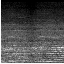

In [4]:
base_path = '/content/drive/MyDrive/soundsClassification/'

x_train=np.load(base_path+'x_train.npy')
y_train=np.load(base_path+'y_train.npy')
x_val=np.load(base_path+'x_val.npy')
y_val=np.load(base_path+'y_val.npy')
x_test=np.load(base_path+'x_test.npy')
y_test=np.load(base_path+'y_test.npy')

cv2_imshow(x_train[0])

In [5]:
np.shape(x_train), np.shape(y_train)

((5238, 64, 64), (5238,))

In [6]:
np.shape(x_val), np.shape(y_val)

((1747, 64, 64), (1747,))

In [7]:
np.shape(x_test), np.shape(y_test)

((1747, 64, 64), (1747,))

In [10]:
input_shape = 64
model = keras.Sequential(
    [
        layers.Conv2D(6, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(input_shape, input_shape, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"),


        layers.Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),


        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(84, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax'),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          880       
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [11]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

results = model.fit(x_train, y_train, epochs=23, validation_data=(x_val, y_val))

Epoch 1/23
164/164 [==============================] - 1s 5ms/step - loss: 2.7117 - accuracy: 0.2606 - val_loss: 1.6595 - val_accuracy: 0.4184
Epoch 2/23
164/164 [==============================] - 1s 4ms/step - loss: 1.6852 - accuracy: 0.3898 - val_loss: 1.4333 - val_accuracy: 0.4951
Epoch 3/23
164/164 [==============================] - 1s 4ms/step - loss: 1.4897 - accuracy: 0.4727 - val_loss: 1.2576 - val_accuracy: 0.5650
Epoch 4/23
164/164 [==============================] - 1s 4ms/step - loss: 1.3504 - accuracy: 0.5244 - val_loss: 1.1562 - val_accuracy: 0.5947
Epoch 5/23
164/164 [==============================] - 1s 4ms/step - loss: 1.2519 - accuracy: 0.5592 - val_loss: 1.0720 - val_accuracy: 0.6503
Epoch 6/23
164/164 [==============================] - 1s 4ms/step - loss: 1.1335 - accuracy: 0.5987 - val_loss: 0.9753 - val_accuracy: 0.6760
Epoch 7/23
164/164 [==============================] - 1s 4ms/step - loss: 1.0618 - accuracy: 0.6317 - val_loss: 0.9511 - val_accuracy: 0.6875
Epoch 

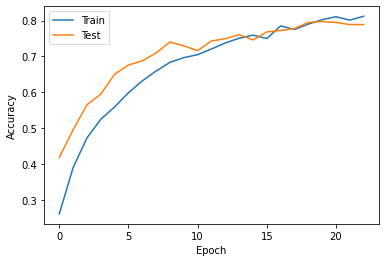

In [13]:
plt.plot(results.history['accuracy'], label='Train')
plt.plot(results.history['val_accuracy'], label='Test')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

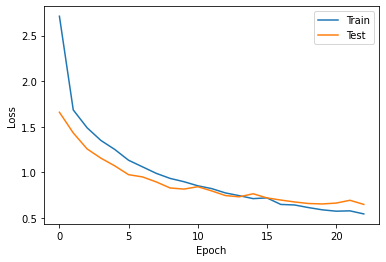

In [14]:
plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

55/55 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.8140
0.8139668107032776
